In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Hough Line')

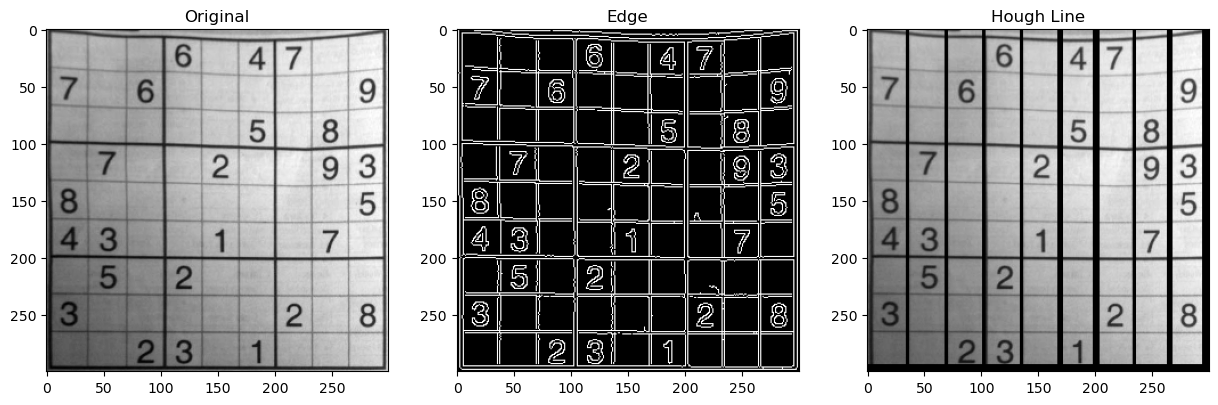

In [2]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

img = cv.imread('../samples/sudoku.png', 0)
img2 = cv.imread('../samples/sudoku.png', 0)

r, c = img.shape[:2]

pts1 = np.float32([[70, 85], [495, 68], [30, 520], [525, 525]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

m = cv.getPerspectiveTransform(pts1, pts2)
dst = cv.warpPerspective(img, m, (300, 300))

img = dst.copy()

edge = cv.Canny(dst, 20, 80, apertureSize=3)
lines = cv.HoughLines(edge, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(dst,(x1,y1),(x2,y2),(0,0,255),2)
    
ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(edge, cmap='gray')
ax2.set_title('Edge')
ax3.imshow(dst, cmap='gray')
ax3.set_title('Hough Line')

Text(0.5, 1.0, 'Hough Line')

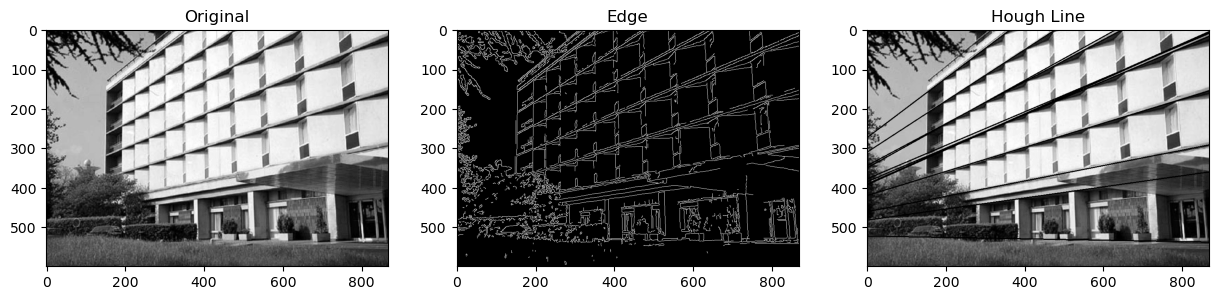

In [3]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

img = cv.imread('../samples/building.jpg', 0)
img2 = cv.imread('../samples/building.jpg', 0)

edge = cv.Canny(img, 130, 200, apertureSize=3)
lines = cv.HoughLines(edge, 1, np.pi / 180, 200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img2,(x1,y1),(x2,y2),(0,0,255),2)
    
ax1.imshow(img, cmap='gray')
ax1.set_title('Original')
ax2.imshow(edge, cmap='gray')
ax2.set_title('Edge')
ax3.imshow(img2, cmap='gray')
ax3.set_title('Hough Line')

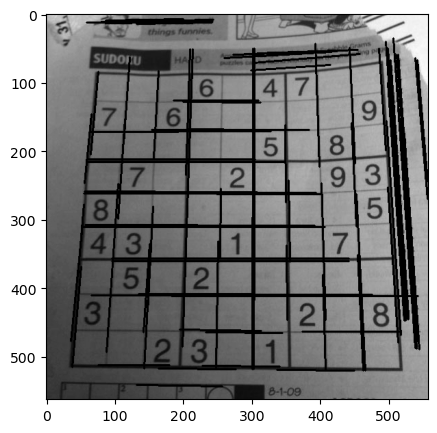

In [4]:
# 확률적 허프 변환
# 1. 반환값이 라인의 시작점과 끝점
# 2. 모든 에지를 고려하지 않고, 라인 탐지에 사용할 충분한 정도의 에지를 랜덤하게 선택
# minLineLength : 선으로 인정할 최소 길이
# maxLineGap : 같은 직선으로 간주할 최대 에지 점 간격

img = cv.imread('../samples/sudoku.png', 0)

edge = cv.Canny(img, 20, 80, apertureSize=3)
lines = cv.HoughLinesP(edge, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

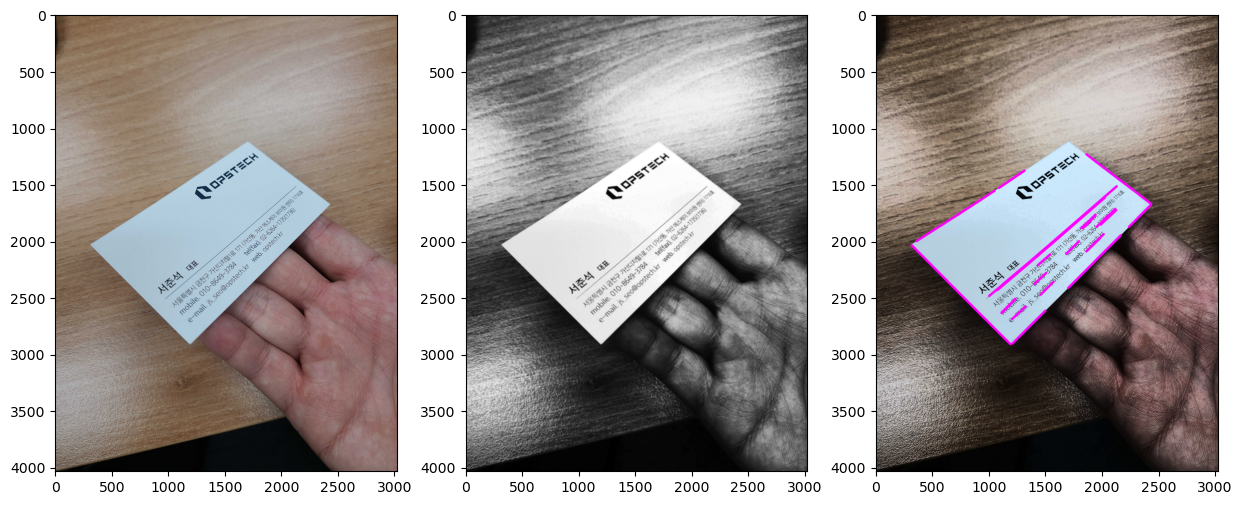

In [12]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

img = cv.imread('../samples/card.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_original = img.copy()

# hist equalization
img = cv.cvtColor(img, cv.COLOR_RGB2HSV)
img[:,:,2] = cv.equalizeHist(img[:,:,2])
img = cv.cvtColor(img, cv.COLOR_HSV2RGB)

# gaussian blur
blur = cv.GaussianBlur(img, (17, 17), 0)

# grayscale
gray = cv.cvtColor(blur, cv.COLOR_RGB2GRAY)

# canny edge
edge = cv.Canny(gray, 51, 130)

# hough line
lines = cv.HoughLinesP(edge, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(255,0,255),20)


ax1.imshow(img_original)
ax2.imshow(gray, cmap='gray')
ax3.imshow(img)